In [16]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [80]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Lectura de data

In [83]:
datos = sns.load_dataset('penguins')

In [84]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 3. Seleccionar, al menos, 5 variables (como mucho, 10), entre las que que debe haber al menos una continua y una discreta.

In [169]:
#nos quedamos con columnas útiles para el análisis (analizar vosotros cuales son las más útiles, aqui tienen columnas nuevas si se fijan)
columnas = ['species', 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

In [170]:
#creamos un nuevo df con las columnas seleccionadas
df2 = df2[columnas] 
df2

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,0.0,0.0,197.0,4050.0
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,0.0,0.0,197.0,4050.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


# Comprobamos nulos

In [171]:
#comprobamos los valores nulos por si acaso 
faltantes = datos.isnull().sum()
faltantes


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [145]:
# Elimina las filas con valores nulos y Reinicia el índice:
datos.dropna(inplace=True)
datos.reset_index(inplace=True,drop=True)
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [147]:
#Comprobamos
faltantes = datos.isnull().sum()
faltantes[faltantes>0]

Series([], dtype: int64)

# Quitar los outilers de nuestro data frame target (df2)

In [172]:
df2

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,0.0,0.0,197.0,4050.0
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,0.0,0.0,197.0,4050.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [173]:
df2

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,0.0,0.0,197.0,4050.0
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,0.0,0.0,197.0,4050.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [174]:
df2.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

# Heatmap

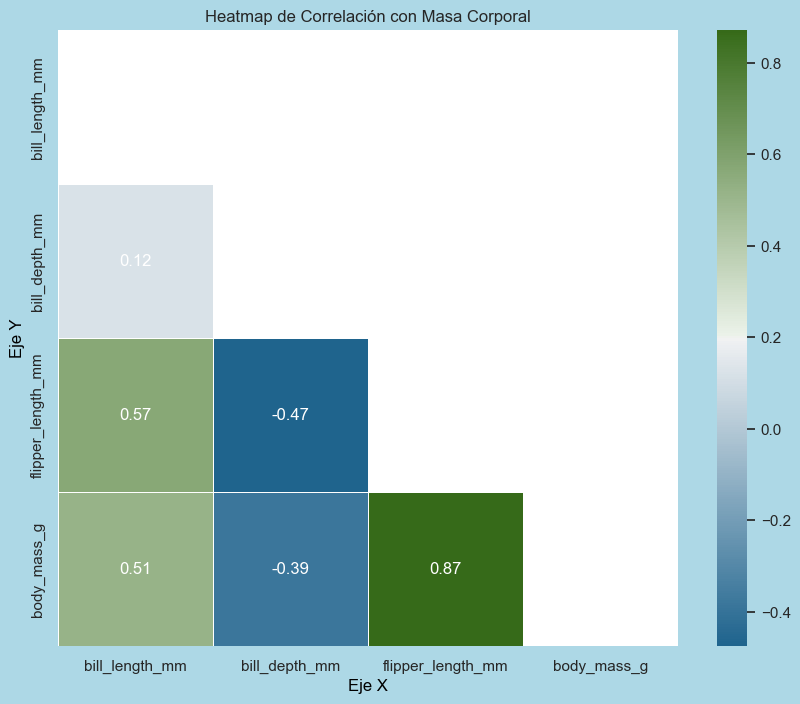

In [175]:

# Calcula la matriz de correlación
correlation_matrix = df2.corr()

# Ordena la matriz de correlación según la correlación con "body_mass_g"
sorted_corr_matrix = correlation_matrix.sort_values(by='body_mass_g', ascending=False)
sorted_corr_matrix = sorted_corr_matrix.reindex(sorted_corr_matrix.columns, axis=0)

# Crea una máscara triangular inferior #que es esto?duda
mask = np.triu(np.ones_like(sorted_corr_matrix, dtype=bool))

# Configura el estilo de Seaborn
sns.set(style="white")
sns.set_palette("pastel")
paleta_divergente = sns.diverging_palette(240, 120, s=90, l=40, n=256, center="light")
# Crea un heatmap con Seaborn utilizando la máscara
plt.figure(figsize=(10, 8))

# Configuración del texto del annot en rojo
annot_kws = {"color": "white"}

sns.heatmap(sorted_corr_matrix, annot=True, fmt=".2f", cmap=paleta_divergente, linewidths=0.5, mask=mask, annot_kws=annot_kws)

# Añade un título con color blanco
plt.title("Heatmap de Correlación con Masa Corporal")

# Hacer el fondo transparente
plt.gcf().set_facecolor('lightBlue')

# Configura el color del título y etiquetas de los ejes en blanco
plt.xlabel("Eje X", color="black")
plt.ylabel("Eje Y", color="black")

# Muestra el heatmap con el colorbar predeterminado
plt.show()


En este ejemplo vemos como hay una alta correlación entre la masa corporal del pinguino  la longitud de sus alas. En contraste, la longitud del pico a penas se relaciona con la de la masa corporal

# Mostrar una de las variables continuas y su relación frente a otra variable que actúe de objetivo

In [176]:
df2.columns


Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

Mi variable continua y bjetivo es body_mass_g, y la variable discreta es species

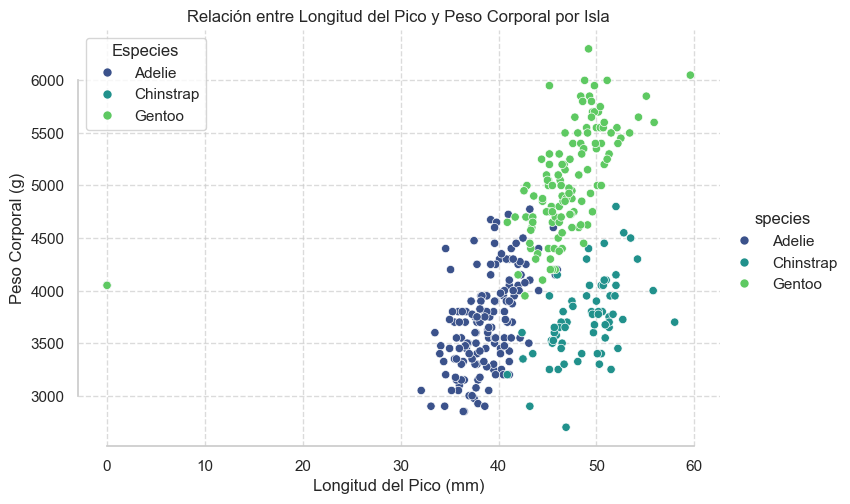

In [177]:
# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Crea una gráfica de dispersión más atractiva
g = sns.relplot(data=df2, x='bill_length_mm', y='body_mass_g', hue='species', palette="viridis", aspect=1.5)

# Añade un título
g.ax.set_title("Relación entre Longitud del Pico y Peso Corporal por Isla")

# Añade etiquetas a los ejes
plt.xlabel("Longitud del Pico (mm)")
plt.ylabel("Peso Corporal (g)")

# Añade una leyenda
plt.legend(title="Especies")

# Añade más detalles visuales
sns.despine(trim=True)
plt.grid(True, linestyle='--', alpha=0.7)

# Muestra la gráfica de dispersión mejorada
plt.show()

In [185]:
df2.groupby('species')['body_mass_g'].median()

species
Adelie       3700.0
Chinstrap    3700.0
Gentoo       5000.0
Name: body_mass_g, dtype: float64

En esta gráfica de dispersión vemos como los Adelie y Chinstrap tienen pesos parecidos, mientras que Gentoo, pesa de media un kilogramo más.

# Mostrar una de las variables discretas y su relación frente a otra variable (la misma del anterior) que actúe de objetivo.

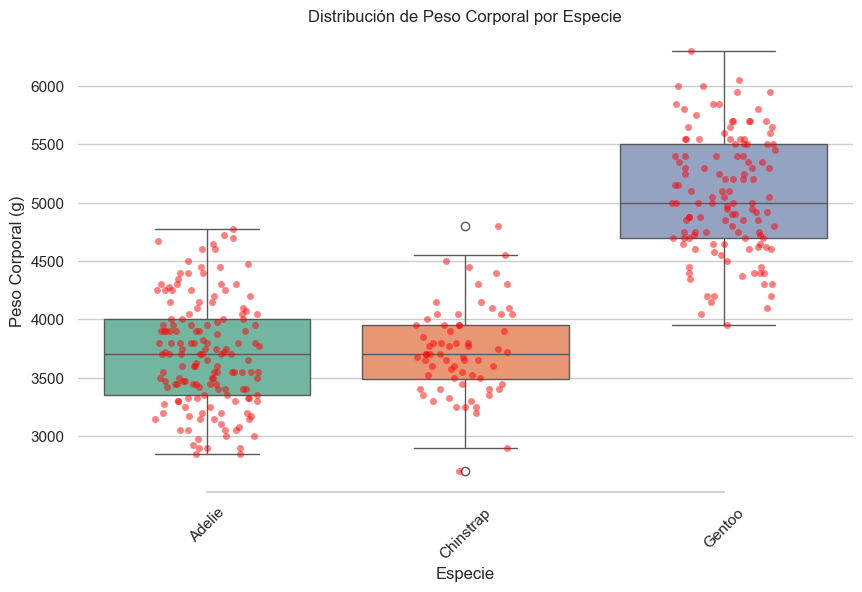

In [193]:
# Configura el estilo de Seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='species', y='body_mass_g', palette="Set2")
plt.title("Distribución de Peso Corporal por Especie")

# Añade etiquetas a los ejes
plt.xlabel("Especie")
plt.ylabel("Peso Corporal (g)")

# Añade más detalles visuales
sns.despine(trim=True, left=True)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mayor legibilidad

# Añade información de los valores atípicos (outliers)
sns.stripplot(data=df, x='species', y='body_mass_g', color='red', jitter=0.2, size=5, alpha=0.5)

# Muestra la gráfica de caja mejorada
plt.show()

En este gráfico vemos como el peso de los Chinstrap ronda mayormenteentre 3,5 y 4kg, mientras que los Adelie tienen una mayor dispersión de peso. La gran diferencia está en lo Gentoo, que su media de peso es 1,5kg más alta que las otras dos.